In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import *
import random
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('../../raw/LiChuan/trainallfeatures.csv')
# test = pd.read_csv('../../raw/LiChuan/test_feature.csv')
submit = pd.read_csv('../../raw/CarsSaleForecast/yancheng_testA_20171225.csv')

In [3]:
# 去掉 2012 年数据, 噪音太多
train = train[train['year']!=2012]

In [5]:
# year 和 month 进行 one-hot 编码
train.drop_duplicates(inplace=True)
labels = train.sale_quantity[:8120]
train = train.drop(['class_id','sale_quantity', 'sale_date'], axis=1)

# train_test = pd.concat([train, test]).reset_index(drop=True)
# year_dummies = pd.get_dummies(train['year'], prefix='year')
# month_dummies = pd.get_dummies(train['month'], prefix='month')
# train = pd.concat([train, year_dummies], axis=1)
# train = pd.concat([train, month_dummies], axis=1)
# train = train.drop(['year', 'month'], axis=1)
# train.fillna(0.0, inplace=True)

test = train[8120:].reset_index(drop=True)
train = train[:8120].reset_index(drop=True)

In [5]:
# 获取 2017-10 作为测试集
test_X = train[-140:]
test_Y = labels[-140:]

In [6]:
# 2013-01 至 2017-10 作为训练集
train_X = train[:-140]
train_Y = labels[:-140]

## 调整 XGBoost 参数

In [7]:
# RMSE = 125
rmses = []
trainset = xgb.DMatrix(train,label=labels)
testset = xgb.DMatrix(test)

params = {
'booster': 'gbtree', # 基于树的模型进行计算
'objective': 'reg:linear', # 线性回归
'eval_metric': 'rmse', # RMSE 评价函数
'gamma': 0.1, # 在树的叶子节点上进一步划分所需的最小损失减少。算法越大，越保守。
'min_child_weight': 1.1, # 孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束。
'max_depth': 5, # 树的最大深度。缺省值为6
'lambda': 10, # L2 正则的惩罚系数
'subsample': 0.8, # 用于训练模型的子样本占整个样本集合的比例。
'colsample_bytree': 0.8, # 在建立树时对特征采样的比例。
'tree_method': 'exact' # 树的构造算法-Exact greedy algorithm(确切贪心算法)
}

watchlist = [(trainset,'train')]
model = xgb.train(params, trainset, num_boost_round=4000,evals=watchlist)
predict_test_X = model.predict(testset)
# predict = test_Y - predict_test_X*0.6 - predict_test_X2*0.4
# rmsetmp = sp.sqrt(sp.mean((test_Y - predict) ** 2))

# print('This time rmse is: '+ str(rmsetmp))
# rmses.append(rmsetmp)

[0]	train-rmse:437.296
[1]	train-rmse:344.168
[2]	train-rmse:281.1
[3]	train-rmse:239.679
[4]	train-rmse:211.032
[5]	train-rmse:190.139
[6]	train-rmse:175.713
[7]	train-rmse:164.719
[8]	train-rmse:156.785
[9]	train-rmse:150.554
[10]	train-rmse:145.399
[11]	train-rmse:140.072
[12]	train-rmse:135.981
[13]	train-rmse:133.051
[14]	train-rmse:131.369
[15]	train-rmse:128.094
[16]	train-rmse:125.823
[17]	train-rmse:122.219
[18]	train-rmse:118.995
[19]	train-rmse:117.557
[20]	train-rmse:115.619
[21]	train-rmse:113.937
[22]	train-rmse:112.775
[23]	train-rmse:111.601
[24]	train-rmse:110.431
[25]	train-rmse:109.309
[26]	train-rmse:108.166
[27]	train-rmse:107.217
[28]	train-rmse:106.145
[29]	train-rmse:105.43
[30]	train-rmse:104.568
[31]	train-rmse:103.912
[32]	train-rmse:102.746
[33]	train-rmse:101.158
[34]	train-rmse:99.8306
[35]	train-rmse:98.913
[36]	train-rmse:97.8315
[37]	train-rmse:96.3823
[38]	train-rmse:95.8889
[39]	train-rmse:95.6171
[40]	train-rmse:94.8336
[41]	train-rmse:94.2207
[42]	t

[334]	train-rmse:21.0793
[335]	train-rmse:21.0551
[336]	train-rmse:20.9858
[337]	train-rmse:20.8724
[338]	train-rmse:20.8203
[339]	train-rmse:20.7344
[340]	train-rmse:20.6572
[341]	train-rmse:20.5864
[342]	train-rmse:20.5222
[343]	train-rmse:20.4475
[344]	train-rmse:20.3786
[345]	train-rmse:20.3118
[346]	train-rmse:20.2289
[347]	train-rmse:20.1627
[348]	train-rmse:20.07
[349]	train-rmse:19.9831
[350]	train-rmse:19.9127
[351]	train-rmse:19.842
[352]	train-rmse:19.7548
[353]	train-rmse:19.7138
[354]	train-rmse:19.6484
[355]	train-rmse:19.577
[356]	train-rmse:19.4742
[357]	train-rmse:19.3804
[358]	train-rmse:19.2869
[359]	train-rmse:19.2004
[360]	train-rmse:19.1417
[361]	train-rmse:19.0696
[362]	train-rmse:18.9808
[363]	train-rmse:18.895
[364]	train-rmse:18.8236
[365]	train-rmse:18.7355
[366]	train-rmse:18.6624
[367]	train-rmse:18.6224
[368]	train-rmse:18.5891
[369]	train-rmse:18.5115
[370]	train-rmse:18.4697
[371]	train-rmse:18.389
[372]	train-rmse:18.344
[373]	train-rmse:18.2876
[374]	t

[664]	train-rmse:7.40291
[665]	train-rmse:7.38283
[666]	train-rmse:7.35272
[667]	train-rmse:7.33442
[668]	train-rmse:7.30999
[669]	train-rmse:7.29099
[670]	train-rmse:7.27768
[671]	train-rmse:7.25854
[672]	train-rmse:7.23866
[673]	train-rmse:7.22488
[674]	train-rmse:7.20167
[675]	train-rmse:7.18484
[676]	train-rmse:7.16734
[677]	train-rmse:7.14332
[678]	train-rmse:7.12929
[679]	train-rmse:7.11489
[680]	train-rmse:7.10993
[681]	train-rmse:7.09182
[682]	train-rmse:7.0752
[683]	train-rmse:7.05968
[684]	train-rmse:7.04129
[685]	train-rmse:7.01506
[686]	train-rmse:7.00086
[687]	train-rmse:6.99324
[688]	train-rmse:6.97682
[689]	train-rmse:6.96459
[690]	train-rmse:6.93465
[691]	train-rmse:6.91202
[692]	train-rmse:6.89426
[693]	train-rmse:6.87522
[694]	train-rmse:6.86707
[695]	train-rmse:6.84936
[696]	train-rmse:6.82647
[697]	train-rmse:6.81026
[698]	train-rmse:6.78781
[699]	train-rmse:6.77996
[700]	train-rmse:6.7511
[701]	train-rmse:6.73068
[702]	train-rmse:6.70505
[703]	train-rmse:6.68766
[7

[993]	train-rmse:3.29219
[994]	train-rmse:3.2794
[995]	train-rmse:3.26243
[996]	train-rmse:3.25805
[997]	train-rmse:3.25168
[998]	train-rmse:3.2447
[999]	train-rmse:3.23995
[1000]	train-rmse:3.23353
[1001]	train-rmse:3.22814
[1002]	train-rmse:3.21992
[1003]	train-rmse:3.21111
[1004]	train-rmse:3.20249
[1005]	train-rmse:3.19535
[1006]	train-rmse:3.18964
[1007]	train-rmse:3.17786
[1008]	train-rmse:3.17101
[1009]	train-rmse:3.16436
[1010]	train-rmse:3.15408
[1011]	train-rmse:3.14824
[1012]	train-rmse:3.14542
[1013]	train-rmse:3.13774
[1014]	train-rmse:3.13294
[1015]	train-rmse:3.12785
[1016]	train-rmse:3.11261
[1017]	train-rmse:3.10382
[1018]	train-rmse:3.09577
[1019]	train-rmse:3.09057
[1020]	train-rmse:3.08471
[1021]	train-rmse:3.07768
[1022]	train-rmse:3.06829
[1023]	train-rmse:3.06399
[1024]	train-rmse:3.05859
[1025]	train-rmse:3.05226
[1026]	train-rmse:3.04458
[1027]	train-rmse:3.04115
[1028]	train-rmse:3.03301
[1029]	train-rmse:3.02835
[1030]	train-rmse:3.0222
[1031]	train-rmse:3.01

[1310]	train-rmse:1.72455
[1311]	train-rmse:1.72139
[1312]	train-rmse:1.71715
[1313]	train-rmse:1.71356
[1314]	train-rmse:1.71225
[1315]	train-rmse:1.70343
[1316]	train-rmse:1.70164
[1317]	train-rmse:1.69821
[1318]	train-rmse:1.69617
[1319]	train-rmse:1.69224
[1320]	train-rmse:1.68921
[1321]	train-rmse:1.6869
[1322]	train-rmse:1.68351
[1323]	train-rmse:1.68043
[1324]	train-rmse:1.67689
[1325]	train-rmse:1.67414
[1326]	train-rmse:1.66734
[1327]	train-rmse:1.66428
[1328]	train-rmse:1.6623
[1329]	train-rmse:1.66116
[1330]	train-rmse:1.65956
[1331]	train-rmse:1.65698
[1332]	train-rmse:1.65552
[1333]	train-rmse:1.6513
[1334]	train-rmse:1.64925
[1335]	train-rmse:1.6444
[1336]	train-rmse:1.64162
[1337]	train-rmse:1.63934
[1338]	train-rmse:1.63611
[1339]	train-rmse:1.63336
[1340]	train-rmse:1.63117
[1341]	train-rmse:1.62816
[1342]	train-rmse:1.62472
[1343]	train-rmse:1.62225
[1344]	train-rmse:1.61998
[1345]	train-rmse:1.61711
[1346]	train-rmse:1.61099
[1347]	train-rmse:1.60701
[1348]	train-rms

[1627]	train-rmse:1.02097
[1628]	train-rmse:1.01979
[1629]	train-rmse:1.01823
[1630]	train-rmse:1.01641
[1631]	train-rmse:1.01524
[1632]	train-rmse:1.01409
[1633]	train-rmse:1.01311
[1634]	train-rmse:1.01198
[1635]	train-rmse:1.0109
[1636]	train-rmse:1.00803
[1637]	train-rmse:1.00712
[1638]	train-rmse:1.00576
[1639]	train-rmse:1.0047
[1640]	train-rmse:1.00396
[1641]	train-rmse:0.999859
[1642]	train-rmse:0.997822
[1643]	train-rmse:0.996542
[1644]	train-rmse:0.995
[1645]	train-rmse:0.994147
[1646]	train-rmse:0.992686
[1647]	train-rmse:0.990954
[1648]	train-rmse:0.989859
[1649]	train-rmse:0.988961
[1650]	train-rmse:0.987868
[1651]	train-rmse:0.986248
[1652]	train-rmse:0.985014
[1653]	train-rmse:0.983853
[1654]	train-rmse:0.982443
[1655]	train-rmse:0.981012
[1656]	train-rmse:0.980393
[1657]	train-rmse:0.979258
[1658]	train-rmse:0.977551
[1659]	train-rmse:0.976085
[1660]	train-rmse:0.975051
[1661]	train-rmse:0.973489
[1662]	train-rmse:0.972301
[1663]	train-rmse:0.971119
[1664]	train-rmse:0.

[1933]	train-rmse:0.678309
[1934]	train-rmse:0.677207
[1935]	train-rmse:0.675923
[1936]	train-rmse:0.675389
[1937]	train-rmse:0.674315
[1938]	train-rmse:0.673259
[1939]	train-rmse:0.673062
[1940]	train-rmse:0.672565
[1941]	train-rmse:0.671851
[1942]	train-rmse:0.671321
[1943]	train-rmse:0.670945
[1944]	train-rmse:0.6702
[1945]	train-rmse:0.668263
[1946]	train-rmse:0.665953
[1947]	train-rmse:0.665219
[1948]	train-rmse:0.665012
[1949]	train-rmse:0.664418
[1950]	train-rmse:0.663864
[1951]	train-rmse:0.663295
[1952]	train-rmse:0.662641
[1953]	train-rmse:0.661778
[1954]	train-rmse:0.660683
[1955]	train-rmse:0.659958
[1956]	train-rmse:0.656938
[1957]	train-rmse:0.655345
[1958]	train-rmse:0.654592
[1959]	train-rmse:0.652688
[1960]	train-rmse:0.651847
[1961]	train-rmse:0.651082
[1962]	train-rmse:0.65064
[1963]	train-rmse:0.65002
[1964]	train-rmse:0.649575
[1965]	train-rmse:0.648687
[1966]	train-rmse:0.64823
[1967]	train-rmse:0.647184
[1968]	train-rmse:0.646427
[1969]	train-rmse:0.645812
[1970]

[2238]	train-rmse:0.48544
[2239]	train-rmse:0.484964
[2240]	train-rmse:0.48424
[2241]	train-rmse:0.484064
[2242]	train-rmse:0.483694
[2243]	train-rmse:0.483185
[2244]	train-rmse:0.482927
[2245]	train-rmse:0.481779
[2246]	train-rmse:0.4813
[2247]	train-rmse:0.480575
[2248]	train-rmse:0.479995
[2249]	train-rmse:0.479621
[2250]	train-rmse:0.479164
[2251]	train-rmse:0.478454
[2252]	train-rmse:0.477875
[2253]	train-rmse:0.477685
[2254]	train-rmse:0.477085
[2255]	train-rmse:0.476726
[2256]	train-rmse:0.476334
[2257]	train-rmse:0.476009
[2258]	train-rmse:0.475885
[2259]	train-rmse:0.475375
[2260]	train-rmse:0.474874
[2261]	train-rmse:0.474411
[2262]	train-rmse:0.473797
[2263]	train-rmse:0.473332
[2264]	train-rmse:0.472824
[2265]	train-rmse:0.472532
[2266]	train-rmse:0.472284
[2267]	train-rmse:0.471427
[2268]	train-rmse:0.47063
[2269]	train-rmse:0.470344
[2270]	train-rmse:0.469938
[2271]	train-rmse:0.469118
[2272]	train-rmse:0.468619
[2273]	train-rmse:0.468242
[2274]	train-rmse:0.467964
[2275]

[2543]	train-rmse:0.363519
[2544]	train-rmse:0.36307
[2545]	train-rmse:0.362748
[2546]	train-rmse:0.362353
[2547]	train-rmse:0.362227
[2548]	train-rmse:0.361998
[2549]	train-rmse:0.361856
[2550]	train-rmse:0.361408
[2551]	train-rmse:0.360998
[2552]	train-rmse:0.360769
[2553]	train-rmse:0.3605
[2554]	train-rmse:0.360045
[2555]	train-rmse:0.35975
[2556]	train-rmse:0.35929
[2557]	train-rmse:0.358806
[2558]	train-rmse:0.358592
[2559]	train-rmse:0.358239
[2560]	train-rmse:0.357896
[2561]	train-rmse:0.357689
[2562]	train-rmse:0.357616
[2563]	train-rmse:0.357211
[2564]	train-rmse:0.357032
[2565]	train-rmse:0.356863
[2566]	train-rmse:0.356556
[2567]	train-rmse:0.356491
[2568]	train-rmse:0.35632
[2569]	train-rmse:0.356133
[2570]	train-rmse:0.355781
[2571]	train-rmse:0.355538
[2572]	train-rmse:0.355272
[2573]	train-rmse:0.354855
[2574]	train-rmse:0.354605
[2575]	train-rmse:0.354145
[2576]	train-rmse:0.353867
[2577]	train-rmse:0.353286
[2578]	train-rmse:0.352899
[2579]	train-rmse:0.35264
[2580]	t

[2849]	train-rmse:0.283147
[2850]	train-rmse:0.282711
[2851]	train-rmse:0.282573
[2852]	train-rmse:0.282331
[2853]	train-rmse:0.282279
[2854]	train-rmse:0.282179
[2855]	train-rmse:0.281999
[2856]	train-rmse:0.281805
[2857]	train-rmse:0.281516
[2858]	train-rmse:0.281403
[2859]	train-rmse:0.281169
[2860]	train-rmse:0.280987
[2861]	train-rmse:0.280594
[2862]	train-rmse:0.280475
[2863]	train-rmse:0.280254
[2864]	train-rmse:0.280053
[2865]	train-rmse:0.279894
[2866]	train-rmse:0.279167
[2867]	train-rmse:0.279049
[2868]	train-rmse:0.278927
[2869]	train-rmse:0.278876
[2870]	train-rmse:0.278684
[2871]	train-rmse:0.278519
[2872]	train-rmse:0.278293
[2873]	train-rmse:0.278096
[2874]	train-rmse:0.277993
[2875]	train-rmse:0.277872
[2876]	train-rmse:0.277609
[2877]	train-rmse:0.277452
[2878]	train-rmse:0.277072
[2879]	train-rmse:0.276921
[2880]	train-rmse:0.276732
[2881]	train-rmse:0.276482
[2882]	train-rmse:0.276405
[2883]	train-rmse:0.276209
[2884]	train-rmse:0.276087
[2885]	train-rmse:0.275958
[

[3154]	train-rmse:0.236255
[3155]	train-rmse:0.236171
[3156]	train-rmse:0.236052
[3157]	train-rmse:0.235942
[3158]	train-rmse:0.235901
[3159]	train-rmse:0.235782
[3160]	train-rmse:0.235641
[3161]	train-rmse:0.235513
[3162]	train-rmse:0.235427
[3163]	train-rmse:0.235337
[3164]	train-rmse:0.235325
[3165]	train-rmse:0.235261
[3166]	train-rmse:0.23522
[3167]	train-rmse:0.235018
[3168]	train-rmse:0.234943
[3169]	train-rmse:0.234676
[3170]	train-rmse:0.234638
[3171]	train-rmse:0.234559
[3172]	train-rmse:0.234489
[3173]	train-rmse:0.234324
[3174]	train-rmse:0.234229
[3175]	train-rmse:0.234166
[3176]	train-rmse:0.234047
[3177]	train-rmse:0.234001
[3178]	train-rmse:0.23389
[3179]	train-rmse:0.233815
[3180]	train-rmse:0.23373
[3181]	train-rmse:0.233592
[3182]	train-rmse:0.233456
[3183]	train-rmse:0.233336
[3184]	train-rmse:0.233304
[3185]	train-rmse:0.233243
[3186]	train-rmse:0.23316
[3187]	train-rmse:0.23309
[3188]	train-rmse:0.232936
[3189]	train-rmse:0.23268
[3190]	train-rmse:0.232634
[3191]	

[3459]	train-rmse:0.209635
[3460]	train-rmse:0.209605
[3461]	train-rmse:0.209536
[3462]	train-rmse:0.209458
[3463]	train-rmse:0.209406
[3464]	train-rmse:0.209287
[3465]	train-rmse:0.209235
[3466]	train-rmse:0.209207
[3467]	train-rmse:0.209174
[3468]	train-rmse:0.20914
[3469]	train-rmse:0.209091
[3470]	train-rmse:0.209026
[3471]	train-rmse:0.208993
[3472]	train-rmse:0.208919
[3473]	train-rmse:0.208832
[3474]	train-rmse:0.208809
[3475]	train-rmse:0.208808
[3476]	train-rmse:0.20879
[3477]	train-rmse:0.208718
[3478]	train-rmse:0.208657
[3479]	train-rmse:0.208599
[3480]	train-rmse:0.208582
[3481]	train-rmse:0.208423
[3482]	train-rmse:0.208377
[3483]	train-rmse:0.208292
[3484]	train-rmse:0.208181
[3485]	train-rmse:0.208178
[3486]	train-rmse:0.208105
[3487]	train-rmse:0.208045
[3488]	train-rmse:0.207978
[3489]	train-rmse:0.20794
[3490]	train-rmse:0.207896
[3491]	train-rmse:0.207895
[3492]	train-rmse:0.207826
[3493]	train-rmse:0.207697
[3494]	train-rmse:0.20767
[3495]	train-rmse:0.207665
[3496

[3764]	train-rmse:0.192912
[3765]	train-rmse:0.192891
[3766]	train-rmse:0.192827
[3767]	train-rmse:0.192833
[3768]	train-rmse:0.192748
[3769]	train-rmse:0.192702
[3770]	train-rmse:0.192689
[3771]	train-rmse:0.192647
[3772]	train-rmse:0.192633
[3773]	train-rmse:0.192603
[3774]	train-rmse:0.19254
[3775]	train-rmse:0.192451
[3776]	train-rmse:0.192446
[3777]	train-rmse:0.192446
[3778]	train-rmse:0.192375
[3779]	train-rmse:0.192299
[3780]	train-rmse:0.192201
[3781]	train-rmse:0.192182
[3782]	train-rmse:0.192145
[3783]	train-rmse:0.192099
[3784]	train-rmse:0.192037
[3785]	train-rmse:0.191985
[3786]	train-rmse:0.191988
[3787]	train-rmse:0.191913
[3788]	train-rmse:0.191834
[3789]	train-rmse:0.191822
[3790]	train-rmse:0.191799
[3791]	train-rmse:0.191762
[3792]	train-rmse:0.19175
[3793]	train-rmse:0.191749
[3794]	train-rmse:0.191641
[3795]	train-rmse:0.191637
[3796]	train-rmse:0.191617
[3797]	train-rmse:0.191611
[3798]	train-rmse:0.191599
[3799]	train-rmse:0.191579
[3800]	train-rmse:0.191549
[38

In [8]:
submit['predict_quantity'] = predict_test_X
submit.to_csv('../../raw/LiChuan/result_20180221_xgboost-allfeatures.csv',index=False, header=True)  

In [32]:
# 上月销量* 0.94
predict_test_X2 = test_X['sale_quantity_this_last_month'].values * 0.94

In [44]:
predict = predict_test_X*0.6 + predict_test_X2*0.4

In [48]:
abs(test_Y - predict)[120:]

9780     20.654245
9781     25.777212
9782    116.636486
9783     47.350278
9784     24.549963
9785     43.520290
9786     40.337372
9787     24.050985
9788    124.324448
9789    101.827955
9790    211.509259
9791     54.526615
9792    116.397966
9793     43.719769
9794    230.572465
9795     72.664754
9796     55.678374
9797      7.207872
9798     89.229832
9799     97.418356
Name: sale_quantity, dtype: float64

In [26]:
predict_test_X[-36]

814.83411

In [29]:
test_Y[9764]

1231.0

In [40]:
sp.sqrt(sp.mean((test_Y - predict_test_X*0.65 - predict_test_X2*0.35) ** 2))

116.42718872848225

In [22]:
(abs(test_Y - predict_test_X)>400)[120:]

9780    False
9781    False
9782    False
9783    False
9784    False
9785    False
9786    False
9787    False
9788    False
9789    False
9790    False
9791    False
9792    False
9793    False
9794    False
9795    False
9796    False
9797    False
9798    False
9799    False
Name: sale_quantity, dtype: bool

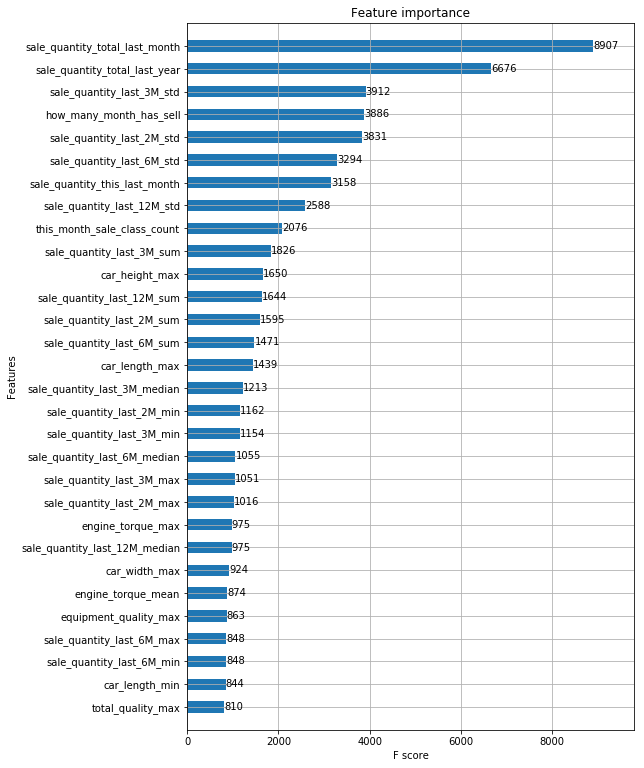

In [54]:
# 分析重要性
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=30, height=0.5, ax=ax)

## 全特征 + LightGBM

In [49]:
# 定义交叉验证函数
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, labels, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [52]:
# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=1100,
                              max_bin=55, bagging_fraction=0.8,
                              bagging_freq=5, feature_fraction=0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf=5, min_sum_hessian_in_leaf=11)

In [55]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 216.0114 (93.1873)



In [57]:
model_lgb.fit(train_X, train_Y)
predict_lgb = model_lgb.predict(test_X)

In [65]:
sp.sqrt(sp.mean((test_Y - predict_test_X*0.6 - predict_test_X2*0.4) ** 2))

116.54034221257054

In [63]:
sp.sqrt(sp.mean((test_Y - predict_test_X2) ** 2))

131.78488718904217

In [58]:
predict_lgb

array([  305.11728703,   155.47651192,   163.52244581,   273.53239641,
         106.76845196,   246.68285855,   334.72712421,   571.28806402,
         302.38210278,   410.65017262,   616.38733752,  1744.18852266,
         864.96137772,   718.79603746,   152.93462265,   760.11098785,
         108.20066775,  1633.16213847,  1611.91056711,   352.58729705,
         236.86509971,   146.42969058,   302.96132537,   263.6182854 ,
         178.83487375,   300.1590073 ,   397.32865052,   254.0193041 ,
         287.47284557,   498.28175512,   498.85387513,   677.25806189,
         138.65917959,   448.87322762,   320.931706  ,   597.24837558,
        2479.54167683,   221.80066448,   332.8850566 ,   596.06101347,
         125.21974461,   122.21627246,   339.83447601,   549.16535608,
         255.30808176,   891.1719068 ,   100.32226432,   212.29567171,
        2150.16856896,   144.89706097,   203.86696466,   111.9153409 ,
         337.81524409,    76.88346983,   165.59121461,   178.59059266,
      

## 测试全特征 + 无窗口时序

In [31]:
train = pd.read_csv('../../raw/caijun/trainSaleDate.csv')
# test = pd.read_csv('../../raw/LiChuan/test_feature.csv')
submit = pd.read_csv('../../raw/CarsSaleForecast/yancheng_testA_20171225.csv')

In [32]:
# 去掉 2012 年数据, 噪音太多
train = train[train['year']!=2012]

In [33]:
# year 和 month 进行 one-hot 编码
train.drop_duplicates(inplace=True)
labels = train.sale_quantity[:8120]
train = train.drop(['class_id','sale_quantity'], axis=1)

# train_test = pd.concat([train, test]).reset_index(drop=True)
year_dummies = pd.get_dummies(train['year'], prefix='year')
month_dummies = pd.get_dummies(train['month'], prefix='month')
train = pd.concat([train, year_dummies], axis=1)
train = pd.concat([train, month_dummies], axis=1)
train = train.drop(['year', 'month'], axis=1)
train.fillna(0.0, inplace=True)

In [34]:
# 获取 2017-10 作为测试集
test_X = train[-140:]
test_Y = labels[-140:]

In [35]:
# 2012-01 至 2017-10 作为训练集
train_X = train[:-140]
train_Y = labels[:-140]

In [30]:
# RMSE = 125
rmses = []
trainset = xgb.DMatrix(train_X,label=train_Y)
testset = xgb.DMatrix(test_X)

params = {
'booster': 'gbtree', # 基于树的模型进行计算
'objective': 'reg:linear', # 线性回归
'eval_metric': 'rmse', # RMSE 评价函数
'gamma': 0.1, # 在树的叶子节点上进一步划分所需的最小损失减少。算法越大，越保守。
'min_child_weight': 1.1, # 孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束。
'max_depth': 5, # 树的最大深度。缺省值为6
'lambda': 10, # L2 正则的惩罚系数
'subsample': 0.8, # 用于训练模型的子样本占整个样本集合的比例。
'colsample_bytree': 0.8, # 在建立树时对特征采样的比例。
'seed': 5,
'tree_method': 'exact' # 树的构造算法-Exact greedy algorithm(确切贪心算法)
}

watchlist = [(trainset,'train')]
model = xgb.train(params, trainset, num_boost_round=4000,evals=watchlist)
predict_test_X = model.predict(testset)
rmsetmp = sp.sqrt(sp.mean((test_Y - predict_test_X) ** 2))

print('This time rmse is: '+ str(rmsetmp))
rmses.append(rmsetmp)

[0]	train-rmse:439.554
[1]	train-rmse:346.786
[2]	train-rmse:283.243
[3]	train-rmse:242.75
[4]	train-rmse:216.047
[5]	train-rmse:195.498
[6]	train-rmse:182.025
[7]	train-rmse:171.791
[8]	train-rmse:164.656
[9]	train-rmse:158.395
[10]	train-rmse:153.522
[11]	train-rmse:148.692
[12]	train-rmse:145.274
[13]	train-rmse:143.029
[14]	train-rmse:140.045
[15]	train-rmse:136.737
[16]	train-rmse:134.922
[17]	train-rmse:130.856
[18]	train-rmse:128.537
[19]	train-rmse:127.181
[20]	train-rmse:125.62
[21]	train-rmse:122.481
[22]	train-rmse:120.157
[23]	train-rmse:118.796
[24]	train-rmse:118.047
[25]	train-rmse:116.656
[26]	train-rmse:115.29
[27]	train-rmse:113.982
[28]	train-rmse:111.976
[29]	train-rmse:110.464
[30]	train-rmse:109.104
[31]	train-rmse:108.406
[32]	train-rmse:106.808
[33]	train-rmse:105.674
[34]	train-rmse:104.998
[35]	train-rmse:103.775
[36]	train-rmse:102.467
[37]	train-rmse:101.39
[38]	train-rmse:100.665
[39]	train-rmse:100.239
[40]	train-rmse:99.6827
[41]	train-rmse:98.2372
[42]	t

[334]	train-rmse:23.0965
[335]	train-rmse:22.9797
[336]	train-rmse:22.9316
[337]	train-rmse:22.8239
[338]	train-rmse:22.74
[339]	train-rmse:22.6272
[340]	train-rmse:22.552
[341]	train-rmse:22.4839
[342]	train-rmse:22.3775
[343]	train-rmse:22.2765
[344]	train-rmse:22.2187
[345]	train-rmse:22.1552
[346]	train-rmse:22.1073
[347]	train-rmse:22.0669
[348]	train-rmse:21.9669
[349]	train-rmse:21.851
[350]	train-rmse:21.7853
[351]	train-rmse:21.7237
[352]	train-rmse:21.6288
[353]	train-rmse:21.5453
[354]	train-rmse:21.446
[355]	train-rmse:21.3279
[356]	train-rmse:21.2645
[357]	train-rmse:21.1957
[358]	train-rmse:21.104
[359]	train-rmse:21.0408
[360]	train-rmse:20.9724
[361]	train-rmse:20.8944
[362]	train-rmse:20.8062
[363]	train-rmse:20.7466
[364]	train-rmse:20.6701
[365]	train-rmse:20.5974
[366]	train-rmse:20.5379
[367]	train-rmse:20.4571
[368]	train-rmse:20.391
[369]	train-rmse:20.3254
[370]	train-rmse:20.2766
[371]	train-rmse:20.1931
[372]	train-rmse:20.1196
[373]	train-rmse:20.0452
[374]	t

[664]	train-rmse:8.51904
[665]	train-rmse:8.49908
[666]	train-rmse:8.48062
[667]	train-rmse:8.4658
[668]	train-rmse:8.4485
[669]	train-rmse:8.43713
[670]	train-rmse:8.42594
[671]	train-rmse:8.40459
[672]	train-rmse:8.37477
[673]	train-rmse:8.35652
[674]	train-rmse:8.31819
[675]	train-rmse:8.28411
[676]	train-rmse:8.26346
[677]	train-rmse:8.2415
[678]	train-rmse:8.22376
[679]	train-rmse:8.20838
[680]	train-rmse:8.18157
[681]	train-rmse:8.15694
[682]	train-rmse:8.14014
[683]	train-rmse:8.11817
[684]	train-rmse:8.0892
[685]	train-rmse:8.07078
[686]	train-rmse:8.0566
[687]	train-rmse:8.04026
[688]	train-rmse:8.0238
[689]	train-rmse:8.00286
[690]	train-rmse:7.98827
[691]	train-rmse:7.96945
[692]	train-rmse:7.95459
[693]	train-rmse:7.93045
[694]	train-rmse:7.91006
[695]	train-rmse:7.891
[696]	train-rmse:7.87339
[697]	train-rmse:7.84979
[698]	train-rmse:7.83851
[699]	train-rmse:7.81565
[700]	train-rmse:7.79258
[701]	train-rmse:7.77097
[702]	train-rmse:7.75726
[703]	train-rmse:7.70297
[704]	tr

[994]	train-rmse:3.91734
[995]	train-rmse:3.90632
[996]	train-rmse:3.90057
[997]	train-rmse:3.89425
[998]	train-rmse:3.88531
[999]	train-rmse:3.88047
[1000]	train-rmse:3.87458
[1001]	train-rmse:3.86831
[1002]	train-rmse:3.86397
[1003]	train-rmse:3.85758
[1004]	train-rmse:3.84143
[1005]	train-rmse:3.83632
[1006]	train-rmse:3.83396
[1007]	train-rmse:3.83174
[1008]	train-rmse:3.81908
[1009]	train-rmse:3.81283
[1010]	train-rmse:3.80402
[1011]	train-rmse:3.79567
[1012]	train-rmse:3.78583
[1013]	train-rmse:3.77888
[1014]	train-rmse:3.77036
[1015]	train-rmse:3.76462
[1016]	train-rmse:3.75688
[1017]	train-rmse:3.75042
[1018]	train-rmse:3.74784
[1019]	train-rmse:3.74163
[1020]	train-rmse:3.73684
[1021]	train-rmse:3.73011
[1022]	train-rmse:3.72266
[1023]	train-rmse:3.7165
[1024]	train-rmse:3.70874
[1025]	train-rmse:3.70167
[1026]	train-rmse:3.69689
[1027]	train-rmse:3.69334
[1028]	train-rmse:3.68517
[1029]	train-rmse:3.67097
[1030]	train-rmse:3.66456
[1031]	train-rmse:3.65044
[1032]	train-rmse:3

[1311]	train-rmse:2.14869
[1312]	train-rmse:2.14562
[1313]	train-rmse:2.14319
[1314]	train-rmse:2.13985
[1315]	train-rmse:2.13626
[1316]	train-rmse:2.13286
[1317]	train-rmse:2.13005
[1318]	train-rmse:2.12707
[1319]	train-rmse:2.12387
[1320]	train-rmse:2.12183
[1321]	train-rmse:2.11783
[1322]	train-rmse:2.11492
[1323]	train-rmse:2.11055
[1324]	train-rmse:2.10812
[1325]	train-rmse:2.10502
[1326]	train-rmse:2.10221
[1327]	train-rmse:2.10103
[1328]	train-rmse:2.09801
[1329]	train-rmse:2.09604
[1330]	train-rmse:2.09473
[1331]	train-rmse:2.09108
[1332]	train-rmse:2.08678
[1333]	train-rmse:2.08044
[1334]	train-rmse:2.07824
[1335]	train-rmse:2.07487
[1336]	train-rmse:2.07154
[1337]	train-rmse:2.06838
[1338]	train-rmse:2.06726
[1339]	train-rmse:2.06515
[1340]	train-rmse:2.06108
[1341]	train-rmse:2.05776
[1342]	train-rmse:2.05628
[1343]	train-rmse:2.05186
[1344]	train-rmse:2.04744
[1345]	train-rmse:2.04583
[1346]	train-rmse:2.04092
[1347]	train-rmse:2.03797
[1348]	train-rmse:2.03423
[1349]	train

[1628]	train-rmse:1.36673
[1629]	train-rmse:1.36488
[1630]	train-rmse:1.36305
[1631]	train-rmse:1.36086
[1632]	train-rmse:1.35806
[1633]	train-rmse:1.35584
[1634]	train-rmse:1.35368
[1635]	train-rmse:1.35223
[1636]	train-rmse:1.35064
[1637]	train-rmse:1.34804
[1638]	train-rmse:1.34533
[1639]	train-rmse:1.3439
[1640]	train-rmse:1.34236
[1641]	train-rmse:1.33524
[1642]	train-rmse:1.33335
[1643]	train-rmse:1.33239
[1644]	train-rmse:1.33159
[1645]	train-rmse:1.32949
[1646]	train-rmse:1.32798
[1647]	train-rmse:1.32676
[1648]	train-rmse:1.32431
[1649]	train-rmse:1.32207
[1650]	train-rmse:1.31918
[1651]	train-rmse:1.31814
[1652]	train-rmse:1.31681
[1653]	train-rmse:1.31559
[1654]	train-rmse:1.31315
[1655]	train-rmse:1.31061
[1656]	train-rmse:1.30904
[1657]	train-rmse:1.30763
[1658]	train-rmse:1.30509
[1659]	train-rmse:1.30289
[1660]	train-rmse:1.30198
[1661]	train-rmse:1.30031
[1662]	train-rmse:1.29854
[1663]	train-rmse:1.29757
[1664]	train-rmse:1.29632
[1665]	train-rmse:1.29503
[1666]	train-

[1942]	train-rmse:0.925808
[1943]	train-rmse:0.924233
[1944]	train-rmse:0.923105
[1945]	train-rmse:0.921823
[1946]	train-rmse:0.920249
[1947]	train-rmse:0.918881
[1948]	train-rmse:0.917974
[1949]	train-rmse:0.917286
[1950]	train-rmse:0.916523
[1951]	train-rmse:0.915498
[1952]	train-rmse:0.914304
[1953]	train-rmse:0.913625
[1954]	train-rmse:0.912715
[1955]	train-rmse:0.911208
[1956]	train-rmse:0.910545
[1957]	train-rmse:0.909731
[1958]	train-rmse:0.908722
[1959]	train-rmse:0.907439
[1960]	train-rmse:0.906417
[1961]	train-rmse:0.905776
[1962]	train-rmse:0.904378
[1963]	train-rmse:0.903688
[1964]	train-rmse:0.903316
[1965]	train-rmse:0.902485
[1966]	train-rmse:0.90143
[1967]	train-rmse:0.900981
[1968]	train-rmse:0.900045
[1969]	train-rmse:0.89923
[1970]	train-rmse:0.898185
[1971]	train-rmse:0.897388
[1972]	train-rmse:0.896527
[1973]	train-rmse:0.895254
[1974]	train-rmse:0.894075
[1975]	train-rmse:0.893333
[1976]	train-rmse:0.891748
[1977]	train-rmse:0.890345
[1978]	train-rmse:0.889641
[19

[2247]	train-rmse:0.66917
[2248]	train-rmse:0.668638
[2249]	train-rmse:0.667869
[2250]	train-rmse:0.66755
[2251]	train-rmse:0.666723
[2252]	train-rmse:0.666234
[2253]	train-rmse:0.66583
[2254]	train-rmse:0.664708
[2255]	train-rmse:0.664105
[2256]	train-rmse:0.663607
[2257]	train-rmse:0.663091
[2258]	train-rmse:0.662243
[2259]	train-rmse:0.661557
[2260]	train-rmse:0.660801
[2261]	train-rmse:0.660299
[2262]	train-rmse:0.660069
[2263]	train-rmse:0.659749
[2264]	train-rmse:0.659095
[2265]	train-rmse:0.65851
[2266]	train-rmse:0.657813
[2267]	train-rmse:0.657353
[2268]	train-rmse:0.65679
[2269]	train-rmse:0.656129
[2270]	train-rmse:0.655763
[2271]	train-rmse:0.655029
[2272]	train-rmse:0.654493
[2273]	train-rmse:0.654223
[2274]	train-rmse:0.653586
[2275]	train-rmse:0.652973
[2276]	train-rmse:0.652149
[2277]	train-rmse:0.651319
[2278]	train-rmse:0.650963
[2279]	train-rmse:0.65047
[2280]	train-rmse:0.649775
[2281]	train-rmse:0.649114
[2282]	train-rmse:0.648769
[2283]	train-rmse:0.648236
[2284]	

[2552]	train-rmse:0.510201
[2553]	train-rmse:0.509543
[2554]	train-rmse:0.509266
[2555]	train-rmse:0.508656
[2556]	train-rmse:0.508392
[2557]	train-rmse:0.507872
[2558]	train-rmse:0.507838
[2559]	train-rmse:0.506887
[2560]	train-rmse:0.506255
[2561]	train-rmse:0.505884
[2562]	train-rmse:0.505122
[2563]	train-rmse:0.504755
[2564]	train-rmse:0.50396
[2565]	train-rmse:0.503589
[2566]	train-rmse:0.503256
[2567]	train-rmse:0.502444
[2568]	train-rmse:0.502212
[2569]	train-rmse:0.501575
[2570]	train-rmse:0.501036
[2571]	train-rmse:0.500864
[2572]	train-rmse:0.500557
[2573]	train-rmse:0.500189
[2574]	train-rmse:0.499888
[2575]	train-rmse:0.499599
[2576]	train-rmse:0.499316
[2577]	train-rmse:0.498926
[2578]	train-rmse:0.498724
[2579]	train-rmse:0.498635
[2580]	train-rmse:0.496979
[2581]	train-rmse:0.496638
[2582]	train-rmse:0.496301
[2583]	train-rmse:0.495629
[2584]	train-rmse:0.495236
[2585]	train-rmse:0.494463
[2586]	train-rmse:0.493972
[2587]	train-rmse:0.493838
[2588]	train-rmse:0.493413
[2

[2857]	train-rmse:0.400512
[2858]	train-rmse:0.400288
[2859]	train-rmse:0.400074
[2860]	train-rmse:0.399673
[2861]	train-rmse:0.399005
[2862]	train-rmse:0.398899
[2863]	train-rmse:0.398743
[2864]	train-rmse:0.398422
[2865]	train-rmse:0.398073
[2866]	train-rmse:0.397752
[2867]	train-rmse:0.397615
[2868]	train-rmse:0.397445
[2869]	train-rmse:0.397129
[2870]	train-rmse:0.396995
[2871]	train-rmse:0.396827
[2872]	train-rmse:0.39635
[2873]	train-rmse:0.396149
[2874]	train-rmse:0.395533
[2875]	train-rmse:0.395347
[2876]	train-rmse:0.394984
[2877]	train-rmse:0.394823
[2878]	train-rmse:0.394649
[2879]	train-rmse:0.394425
[2880]	train-rmse:0.394181
[2881]	train-rmse:0.393764
[2882]	train-rmse:0.393289
[2883]	train-rmse:0.393016
[2884]	train-rmse:0.392927
[2885]	train-rmse:0.392659
[2886]	train-rmse:0.39248
[2887]	train-rmse:0.392101
[2888]	train-rmse:0.391733
[2889]	train-rmse:0.391566
[2890]	train-rmse:0.391181
[2891]	train-rmse:0.390565
[2892]	train-rmse:0.390468
[2893]	train-rmse:0.390277
[28

[3162]	train-rmse:0.325957
[3163]	train-rmse:0.325781
[3164]	train-rmse:0.325178
[3165]	train-rmse:0.324974
[3166]	train-rmse:0.324816
[3167]	train-rmse:0.324565
[3168]	train-rmse:0.324463
[3169]	train-rmse:0.324293
[3170]	train-rmse:0.323967
[3171]	train-rmse:0.323709
[3172]	train-rmse:0.323578
[3173]	train-rmse:0.323388
[3174]	train-rmse:0.323263
[3175]	train-rmse:0.323016
[3176]	train-rmse:0.322809
[3177]	train-rmse:0.322612
[3178]	train-rmse:0.322414
[3179]	train-rmse:0.322191
[3180]	train-rmse:0.321945
[3181]	train-rmse:0.321751
[3182]	train-rmse:0.321555
[3183]	train-rmse:0.321198
[3184]	train-rmse:0.321114
[3185]	train-rmse:0.320841
[3186]	train-rmse:0.320694
[3187]	train-rmse:0.320526
[3188]	train-rmse:0.320312
[3189]	train-rmse:0.320176
[3190]	train-rmse:0.320007
[3191]	train-rmse:0.319704
[3192]	train-rmse:0.319503
[3193]	train-rmse:0.319443
[3194]	train-rmse:0.319206
[3195]	train-rmse:0.319018
[3196]	train-rmse:0.318701
[3197]	train-rmse:0.318507
[3198]	train-rmse:0.318351
[

[3467]	train-rmse:0.273062
[3468]	train-rmse:0.273026
[3469]	train-rmse:0.272871
[3470]	train-rmse:0.272744
[3471]	train-rmse:0.2726
[3472]	train-rmse:0.272405
[3473]	train-rmse:0.272381
[3474]	train-rmse:0.272215
[3475]	train-rmse:0.272068
[3476]	train-rmse:0.271744
[3477]	train-rmse:0.271707
[3478]	train-rmse:0.271649
[3479]	train-rmse:0.271499
[3480]	train-rmse:0.271255
[3481]	train-rmse:0.271207
[3482]	train-rmse:0.270953
[3483]	train-rmse:0.27073
[3484]	train-rmse:0.27063
[3485]	train-rmse:0.270583
[3486]	train-rmse:0.27053
[3487]	train-rmse:0.270477
[3488]	train-rmse:0.270366
[3489]	train-rmse:0.270305
[3490]	train-rmse:0.270303
[3491]	train-rmse:0.270093
[3492]	train-rmse:0.269927
[3493]	train-rmse:0.269763
[3494]	train-rmse:0.269419
[3495]	train-rmse:0.269047
[3496]	train-rmse:0.268861
[3497]	train-rmse:0.268798
[3498]	train-rmse:0.268543
[3499]	train-rmse:0.268441
[3500]	train-rmse:0.268285
[3501]	train-rmse:0.268136
[3502]	train-rmse:0.267927
[3503]	train-rmse:0.267742
[3504]

[3772]	train-rmse:0.236812
[3773]	train-rmse:0.236708
[3774]	train-rmse:0.236693
[3775]	train-rmse:0.2366
[3776]	train-rmse:0.236436
[3777]	train-rmse:0.236442
[3778]	train-rmse:0.236379
[3779]	train-rmse:0.236284
[3780]	train-rmse:0.236273
[3781]	train-rmse:0.236017
[3782]	train-rmse:0.236001
[3783]	train-rmse:0.235873
[3784]	train-rmse:0.235788
[3785]	train-rmse:0.235582
[3786]	train-rmse:0.235613
[3787]	train-rmse:0.235484
[3788]	train-rmse:0.235372
[3789]	train-rmse:0.235248
[3790]	train-rmse:0.235127
[3791]	train-rmse:0.235061
[3792]	train-rmse:0.234926
[3793]	train-rmse:0.234856
[3794]	train-rmse:0.234718
[3795]	train-rmse:0.234654
[3796]	train-rmse:0.234508
[3797]	train-rmse:0.234442
[3798]	train-rmse:0.23437
[3799]	train-rmse:0.234258
[3800]	train-rmse:0.234093
[3801]	train-rmse:0.234037
[3802]	train-rmse:0.233914
[3803]	train-rmse:0.233682
[3804]	train-rmse:0.233576
[3805]	train-rmse:0.233412
[3806]	train-rmse:0.233325
[3807]	train-rmse:0.233157
[3808]	train-rmse:0.233051
[380

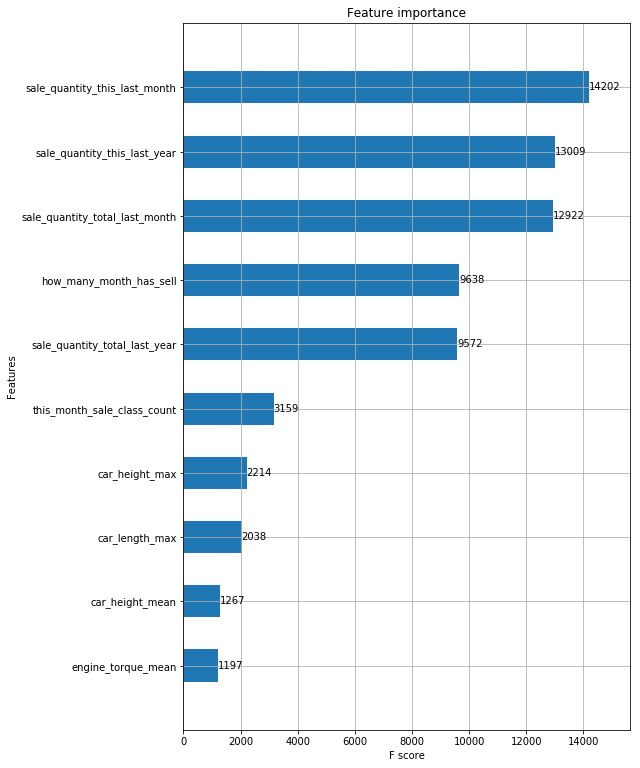

In [37]:
# 分析重要性
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=20, height=0.5, ax=ax)

## 全特征 + 五窗口 std

In [38]:
train = pd.read_csv('../../raw/LiChuan/trainallfeatures2.csv')
# test = pd.read_csv('../../raw/LiChuan/test_feature.csv')
submit = pd.read_csv('../../raw/CarsSaleForecast/yancheng_testA_20171225.csv')

In [39]:
# 去掉 2012 年数据, 噪音太多
train = train[train['year']!=2012]

In [40]:
# year 和 month 进行 one-hot 编码
train.drop_duplicates(inplace=True)
labels = train.sale_quantity[:8120]
train = train.drop(['class_id','sale_quantity', 'sale_date'], axis=1)

# train_test = pd.concat([train, test]).reset_index(drop=True)
year_dummies = pd.get_dummies(train['year'], prefix='year')
month_dummies = pd.get_dummies(train['month'], prefix='month')
train = pd.concat([train, year_dummies], axis=1)
train = pd.concat([train, month_dummies], axis=1)
train = train.drop(['year', 'month'], axis=1)
train.fillna(0.0, inplace=True)

test = train[8120:].reset_index(drop=True)
train = train[:8120].reset_index(drop=True)

In [41]:
# 获取 2017-10 作为测试集
test_X = train[-140:]
test_Y = labels[-140:]

In [42]:
# 2012-01 至 2017-10 作为训练集
train_X = train[:-140]
train_Y = labels[:-140]

In [43]:
# RMSE = 125
rmses = []
trainset = xgb.DMatrix(train_X,label=train_Y)
testset = xgb.DMatrix(test_X)

params = {
'booster': 'gbtree', # 基于树的模型进行计算
'objective': 'reg:linear', # 线性回归
'eval_metric': 'rmse', # RMSE 评价函数
'gamma': 0.1, # 在树的叶子节点上进一步划分所需的最小损失减少。算法越大，越保守。
'min_child_weight': 1.1, # 孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束。
'max_depth': 5, # 树的最大深度。缺省值为6
'lambda': 10, # L2 正则的惩罚系数
'subsample': 0.8, # 用于训练模型的子样本占整个样本集合的比例。
'colsample_bytree': 0.8, # 在建立树时对特征采样的比例。
'seed': 5,
'tree_method': 'exact' # 树的构造算法-Exact greedy algorithm(确切贪心算法)
}

watchlist = [(trainset,'train')]
model = xgb.train(params, trainset, num_boost_round=4000,evals=watchlist)
predict_test_X = model.predict(testset)
rmsetmp = sp.sqrt(sp.mean((test_Y - predict_test_X) ** 2))

print('This time rmse is: '+ str(rmsetmp))
rmses.append(rmsetmp)

[0]	train-rmse:446.922
[1]	train-rmse:353.068
[2]	train-rmse:288.046
[3]	train-rmse:242.967
[4]	train-rmse:212.398
[5]	train-rmse:194.794
[6]	train-rmse:178.905
[7]	train-rmse:167.996
[8]	train-rmse:161.591
[9]	train-rmse:154.939
[10]	train-rmse:148.164
[11]	train-rmse:143.387
[12]	train-rmse:140.657
[13]	train-rmse:136.175
[14]	train-rmse:133.016
[15]	train-rmse:131.676
[16]	train-rmse:129.675
[17]	train-rmse:127.564
[18]	train-rmse:124.978
[19]	train-rmse:123.961
[20]	train-rmse:122.057
[21]	train-rmse:120.376
[22]	train-rmse:118.973
[23]	train-rmse:117.792
[24]	train-rmse:116.4
[25]	train-rmse:114.962
[26]	train-rmse:113.284
[27]	train-rmse:111.306
[28]	train-rmse:109.985
[29]	train-rmse:107.883
[30]	train-rmse:106.168
[31]	train-rmse:105.341
[32]	train-rmse:103.576
[33]	train-rmse:102.786
[34]	train-rmse:102.076
[35]	train-rmse:99.7877
[36]	train-rmse:98.932
[37]	train-rmse:98.2672
[38]	train-rmse:97.1442
[39]	train-rmse:96.3359
[40]	train-rmse:95.7136
[41]	train-rmse:94.868
[42]	t

[334]	train-rmse:23.4494
[335]	train-rmse:23.3953
[336]	train-rmse:23.343
[337]	train-rmse:23.2882
[338]	train-rmse:23.2066
[339]	train-rmse:23.1495
[340]	train-rmse:23.0964
[341]	train-rmse:23.0163
[342]	train-rmse:22.9683
[343]	train-rmse:22.9241
[344]	train-rmse:22.8351
[345]	train-rmse:22.738
[346]	train-rmse:22.6496
[347]	train-rmse:22.5852
[348]	train-rmse:22.4824
[349]	train-rmse:22.4039
[350]	train-rmse:22.3514
[351]	train-rmse:22.2693
[352]	train-rmse:22.1898
[353]	train-rmse:22.094
[354]	train-rmse:22.0067
[355]	train-rmse:21.9227
[356]	train-rmse:21.8663
[357]	train-rmse:21.8042
[358]	train-rmse:21.7069
[359]	train-rmse:21.6627
[360]	train-rmse:21.5916
[361]	train-rmse:21.5366
[362]	train-rmse:21.478
[363]	train-rmse:21.4108
[364]	train-rmse:21.3697
[365]	train-rmse:21.2791
[366]	train-rmse:21.2467
[367]	train-rmse:21.2021
[368]	train-rmse:21.1142
[369]	train-rmse:21.0493
[370]	train-rmse:20.9741
[371]	train-rmse:20.9005
[372]	train-rmse:20.835
[373]	train-rmse:20.767
[374]	

[663]	train-rmse:9.16115
[664]	train-rmse:9.13254
[665]	train-rmse:9.09965
[666]	train-rmse:9.06808
[667]	train-rmse:9.04029
[668]	train-rmse:8.99905
[669]	train-rmse:8.98126
[670]	train-rmse:8.95607
[671]	train-rmse:8.94211
[672]	train-rmse:8.91291
[673]	train-rmse:8.87561
[674]	train-rmse:8.84414
[675]	train-rmse:8.82733
[676]	train-rmse:8.79599
[677]	train-rmse:8.76801
[678]	train-rmse:8.75096
[679]	train-rmse:8.73215
[680]	train-rmse:8.7062
[681]	train-rmse:8.67101
[682]	train-rmse:8.63703
[683]	train-rmse:8.61053
[684]	train-rmse:8.59767
[685]	train-rmse:8.58549
[686]	train-rmse:8.56564
[687]	train-rmse:8.53059
[688]	train-rmse:8.51125
[689]	train-rmse:8.49495
[690]	train-rmse:8.47144
[691]	train-rmse:8.45665
[692]	train-rmse:8.43843
[693]	train-rmse:8.41444
[694]	train-rmse:8.40104
[695]	train-rmse:8.38108
[696]	train-rmse:8.35531
[697]	train-rmse:8.34598
[698]	train-rmse:8.32002
[699]	train-rmse:8.30574
[700]	train-rmse:8.28739
[701]	train-rmse:8.27553
[702]	train-rmse:8.25975
[

[992]	train-rmse:4.22705
[993]	train-rmse:4.22181
[994]	train-rmse:4.21186
[995]	train-rmse:4.20141
[996]	train-rmse:4.19391
[997]	train-rmse:4.18559
[998]	train-rmse:4.17752
[999]	train-rmse:4.16851
[1000]	train-rmse:4.1581
[1001]	train-rmse:4.14965
[1002]	train-rmse:4.14271
[1003]	train-rmse:4.13642
[1004]	train-rmse:4.12635
[1005]	train-rmse:4.11935
[1006]	train-rmse:4.10907
[1007]	train-rmse:4.1008
[1008]	train-rmse:4.09413
[1009]	train-rmse:4.08282
[1010]	train-rmse:4.0738
[1011]	train-rmse:4.06486
[1012]	train-rmse:4.05335
[1013]	train-rmse:4.04376
[1014]	train-rmse:4.03654
[1015]	train-rmse:4.02629
[1016]	train-rmse:4.02389
[1017]	train-rmse:4.01712
[1018]	train-rmse:4.01192
[1019]	train-rmse:4.0052
[1020]	train-rmse:3.99585
[1021]	train-rmse:3.98439
[1022]	train-rmse:3.97743
[1023]	train-rmse:3.97473
[1024]	train-rmse:3.96562
[1025]	train-rmse:3.95645
[1026]	train-rmse:3.94695
[1027]	train-rmse:3.94073
[1028]	train-rmse:3.92853
[1029]	train-rmse:3.92243
[1030]	train-rmse:3.9164

[1309]	train-rmse:2.32553
[1310]	train-rmse:2.32344
[1311]	train-rmse:2.31975
[1312]	train-rmse:2.31486
[1313]	train-rmse:2.30965
[1314]	train-rmse:2.30536
[1315]	train-rmse:2.29993
[1316]	train-rmse:2.29446
[1317]	train-rmse:2.29014
[1318]	train-rmse:2.28633
[1319]	train-rmse:2.2835
[1320]	train-rmse:2.27813
[1321]	train-rmse:2.27405
[1322]	train-rmse:2.27078
[1323]	train-rmse:2.2684
[1324]	train-rmse:2.26426
[1325]	train-rmse:2.26199
[1326]	train-rmse:2.25922
[1327]	train-rmse:2.25641
[1328]	train-rmse:2.25363
[1329]	train-rmse:2.24847
[1330]	train-rmse:2.24476
[1331]	train-rmse:2.24156
[1332]	train-rmse:2.23727
[1333]	train-rmse:2.23537
[1334]	train-rmse:2.23181
[1335]	train-rmse:2.22785
[1336]	train-rmse:2.22511
[1337]	train-rmse:2.22102
[1338]	train-rmse:2.21609
[1339]	train-rmse:2.21081
[1340]	train-rmse:2.20856
[1341]	train-rmse:2.20444
[1342]	train-rmse:2.19855
[1343]	train-rmse:2.19425
[1344]	train-rmse:2.19048
[1345]	train-rmse:2.18841
[1346]	train-rmse:2.18605
[1347]	train-r

[1626]	train-rmse:1.41966
[1627]	train-rmse:1.41814
[1628]	train-rmse:1.41618
[1629]	train-rmse:1.4143
[1630]	train-rmse:1.41288
[1631]	train-rmse:1.41118
[1632]	train-rmse:1.40978
[1633]	train-rmse:1.4072
[1634]	train-rmse:1.40541
[1635]	train-rmse:1.40411
[1636]	train-rmse:1.40173
[1637]	train-rmse:1.39355
[1638]	train-rmse:1.39261
[1639]	train-rmse:1.39098
[1640]	train-rmse:1.38846
[1641]	train-rmse:1.38673
[1642]	train-rmse:1.38359
[1643]	train-rmse:1.38093
[1644]	train-rmse:1.37988
[1645]	train-rmse:1.37793
[1646]	train-rmse:1.3765
[1647]	train-rmse:1.37506
[1648]	train-rmse:1.3738
[1649]	train-rmse:1.37162
[1650]	train-rmse:1.3697
[1651]	train-rmse:1.36701
[1652]	train-rmse:1.36562
[1653]	train-rmse:1.36238
[1654]	train-rmse:1.35971
[1655]	train-rmse:1.3585
[1656]	train-rmse:1.35523
[1657]	train-rmse:1.35284
[1658]	train-rmse:1.35087
[1659]	train-rmse:1.34936
[1660]	train-rmse:1.34791
[1661]	train-rmse:1.34693
[1662]	train-rmse:1.34597
[1663]	train-rmse:1.34449
[1664]	train-rmse:

[1941]	train-rmse:0.939722
[1942]	train-rmse:0.938408
[1943]	train-rmse:0.9374
[1944]	train-rmse:0.936558
[1945]	train-rmse:0.935491
[1946]	train-rmse:0.934041
[1947]	train-rmse:0.933331
[1948]	train-rmse:0.932511
[1949]	train-rmse:0.931545
[1950]	train-rmse:0.930545
[1951]	train-rmse:0.929521
[1952]	train-rmse:0.929106
[1953]	train-rmse:0.928138
[1954]	train-rmse:0.927317
[1955]	train-rmse:0.925829
[1956]	train-rmse:0.923936
[1957]	train-rmse:0.923026
[1958]	train-rmse:0.922265
[1959]	train-rmse:0.921604
[1960]	train-rmse:0.920388
[1961]	train-rmse:0.919545
[1962]	train-rmse:0.918935
[1963]	train-rmse:0.918182
[1964]	train-rmse:0.917524
[1965]	train-rmse:0.916459
[1966]	train-rmse:0.915375
[1967]	train-rmse:0.914465
[1968]	train-rmse:0.912095
[1969]	train-rmse:0.911157
[1970]	train-rmse:0.909596
[1971]	train-rmse:0.908589
[1972]	train-rmse:0.907916
[1973]	train-rmse:0.907066
[1974]	train-rmse:0.90589
[1975]	train-rmse:0.905027
[1976]	train-rmse:0.903799
[1977]	train-rmse:0.902327
[197

[2246]	train-rmse:0.668512
[2247]	train-rmse:0.667912
[2248]	train-rmse:0.667248
[2249]	train-rmse:0.666362
[2250]	train-rmse:0.665909
[2251]	train-rmse:0.665227
[2252]	train-rmse:0.664321
[2253]	train-rmse:0.663606
[2254]	train-rmse:0.662499
[2255]	train-rmse:0.662141
[2256]	train-rmse:0.661751
[2257]	train-rmse:0.661168
[2258]	train-rmse:0.660641
[2259]	train-rmse:0.659958
[2260]	train-rmse:0.659518
[2261]	train-rmse:0.65871
[2262]	train-rmse:0.658057
[2263]	train-rmse:0.657039
[2264]	train-rmse:0.655851
[2265]	train-rmse:0.654861
[2266]	train-rmse:0.654098
[2267]	train-rmse:0.653023
[2268]	train-rmse:0.652578
[2269]	train-rmse:0.652054
[2270]	train-rmse:0.651584
[2271]	train-rmse:0.650737
[2272]	train-rmse:0.650053
[2273]	train-rmse:0.649182
[2274]	train-rmse:0.647418
[2275]	train-rmse:0.646772
[2276]	train-rmse:0.646512
[2277]	train-rmse:0.645893
[2278]	train-rmse:0.645397
[2279]	train-rmse:0.644959
[2280]	train-rmse:0.644543
[2281]	train-rmse:0.644017
[2282]	train-rmse:0.643539
[2

[2551]	train-rmse:0.499206
[2552]	train-rmse:0.498638
[2553]	train-rmse:0.49833
[2554]	train-rmse:0.497887
[2555]	train-rmse:0.497459
[2556]	train-rmse:0.497197
[2557]	train-rmse:0.496683
[2558]	train-rmse:0.496306
[2559]	train-rmse:0.495671
[2560]	train-rmse:0.495426
[2561]	train-rmse:0.495053
[2562]	train-rmse:0.494628
[2563]	train-rmse:0.494281
[2564]	train-rmse:0.493787
[2565]	train-rmse:0.493301
[2566]	train-rmse:0.493135
[2567]	train-rmse:0.4927
[2568]	train-rmse:0.492078
[2569]	train-rmse:0.491679
[2570]	train-rmse:0.491204
[2571]	train-rmse:0.490606
[2572]	train-rmse:0.490111
[2573]	train-rmse:0.489578
[2574]	train-rmse:0.488928
[2575]	train-rmse:0.488499
[2576]	train-rmse:0.488101
[2577]	train-rmse:0.48763
[2578]	train-rmse:0.487313
[2579]	train-rmse:0.486572
[2580]	train-rmse:0.486246
[2581]	train-rmse:0.485922
[2582]	train-rmse:0.485206
[2583]	train-rmse:0.48493
[2584]	train-rmse:0.484521
[2585]	train-rmse:0.483877
[2586]	train-rmse:0.483194
[2587]	train-rmse:0.482694
[2588]

[2856]	train-rmse:0.385802
[2857]	train-rmse:0.385482
[2858]	train-rmse:0.385256
[2859]	train-rmse:0.385031
[2860]	train-rmse:0.384688
[2861]	train-rmse:0.384503
[2862]	train-rmse:0.384144
[2863]	train-rmse:0.383744
[2864]	train-rmse:0.383398
[2865]	train-rmse:0.383053
[2866]	train-rmse:0.38271
[2867]	train-rmse:0.382468
[2868]	train-rmse:0.382135
[2869]	train-rmse:0.381647
[2870]	train-rmse:0.381306
[2871]	train-rmse:0.381038
[2872]	train-rmse:0.380712
[2873]	train-rmse:0.380317
[2874]	train-rmse:0.380127
[2875]	train-rmse:0.379814
[2876]	train-rmse:0.379494
[2877]	train-rmse:0.379142
[2878]	train-rmse:0.378824
[2879]	train-rmse:0.378567
[2880]	train-rmse:0.378386
[2881]	train-rmse:0.378133
[2882]	train-rmse:0.377962
[2883]	train-rmse:0.377476
[2884]	train-rmse:0.377097
[2885]	train-rmse:0.376795
[2886]	train-rmse:0.376506
[2887]	train-rmse:0.376368
[2888]	train-rmse:0.376048
[2889]	train-rmse:0.37565
[2890]	train-rmse:0.375377
[2891]	train-rmse:0.375152
[2892]	train-rmse:0.374846
[28

[3161]	train-rmse:0.311651
[3162]	train-rmse:0.311566
[3163]	train-rmse:0.31141
[3164]	train-rmse:0.311294
[3165]	train-rmse:0.311084
[3166]	train-rmse:0.311001
[3167]	train-rmse:0.310928
[3168]	train-rmse:0.310891
[3169]	train-rmse:0.31075
[3170]	train-rmse:0.310692
[3171]	train-rmse:0.310591
[3172]	train-rmse:0.310296
[3173]	train-rmse:0.309852
[3174]	train-rmse:0.309615
[3175]	train-rmse:0.30946
[3176]	train-rmse:0.309347
[3177]	train-rmse:0.309054
[3178]	train-rmse:0.308841
[3179]	train-rmse:0.308665
[3180]	train-rmse:0.308445
[3181]	train-rmse:0.308133
[3182]	train-rmse:0.307633
[3183]	train-rmse:0.307461
[3184]	train-rmse:0.307392
[3185]	train-rmse:0.307005
[3186]	train-rmse:0.306694
[3187]	train-rmse:0.306558
[3188]	train-rmse:0.306404
[3189]	train-rmse:0.306283
[3190]	train-rmse:0.306202
[3191]	train-rmse:0.305892
[3192]	train-rmse:0.305788
[3193]	train-rmse:0.305658
[3194]	train-rmse:0.30546
[3195]	train-rmse:0.305437
[3196]	train-rmse:0.305124
[3197]	train-rmse:0.305022
[3198

[3466]	train-rmse:0.261844
[3467]	train-rmse:0.26164
[3468]	train-rmse:0.261498
[3469]	train-rmse:0.261329
[3470]	train-rmse:0.261206
[3471]	train-rmse:0.26109
[3472]	train-rmse:0.260856
[3473]	train-rmse:0.260503
[3474]	train-rmse:0.260449
[3475]	train-rmse:0.260326
[3476]	train-rmse:0.260108
[3477]	train-rmse:0.259747
[3478]	train-rmse:0.259647
[3479]	train-rmse:0.259523
[3480]	train-rmse:0.259335
[3481]	train-rmse:0.259244
[3482]	train-rmse:0.259133
[3483]	train-rmse:0.259007
[3484]	train-rmse:0.258878
[3485]	train-rmse:0.258715
[3486]	train-rmse:0.258544
[3487]	train-rmse:0.258511
[3488]	train-rmse:0.25843
[3489]	train-rmse:0.258148
[3490]	train-rmse:0.2579
[3491]	train-rmse:0.257713
[3492]	train-rmse:0.257446
[3493]	train-rmse:0.257282
[3494]	train-rmse:0.257155
[3495]	train-rmse:0.257033
[3496]	train-rmse:0.257013
[3497]	train-rmse:0.256934
[3498]	train-rmse:0.256805
[3499]	train-rmse:0.25654
[3500]	train-rmse:0.256408
[3501]	train-rmse:0.256114
[3502]	train-rmse:0.255898
[3503]	

[3771]	train-rmse:0.22835
[3772]	train-rmse:0.228235
[3773]	train-rmse:0.228071
[3774]	train-rmse:0.227987
[3775]	train-rmse:0.227919
[3776]	train-rmse:0.227895
[3777]	train-rmse:0.227793
[3778]	train-rmse:0.227662
[3779]	train-rmse:0.227553
[3780]	train-rmse:0.227373
[3781]	train-rmse:0.227337
[3782]	train-rmse:0.227256
[3783]	train-rmse:0.227225
[3784]	train-rmse:0.227088
[3785]	train-rmse:0.227051
[3786]	train-rmse:0.227022
[3787]	train-rmse:0.226858
[3788]	train-rmse:0.226825
[3789]	train-rmse:0.226798
[3790]	train-rmse:0.226754
[3791]	train-rmse:0.226671
[3792]	train-rmse:0.226628
[3793]	train-rmse:0.226604
[3794]	train-rmse:0.226558
[3795]	train-rmse:0.226484
[3796]	train-rmse:0.226398
[3797]	train-rmse:0.226098
[3798]	train-rmse:0.226042
[3799]	train-rmse:0.226024
[3800]	train-rmse:0.225903
[3801]	train-rmse:0.225735
[3802]	train-rmse:0.225641
[3803]	train-rmse:0.225592
[3804]	train-rmse:0.225443
[3805]	train-rmse:0.225434
[3806]	train-rmse:0.225337
[3807]	train-rmse:0.225293
[3

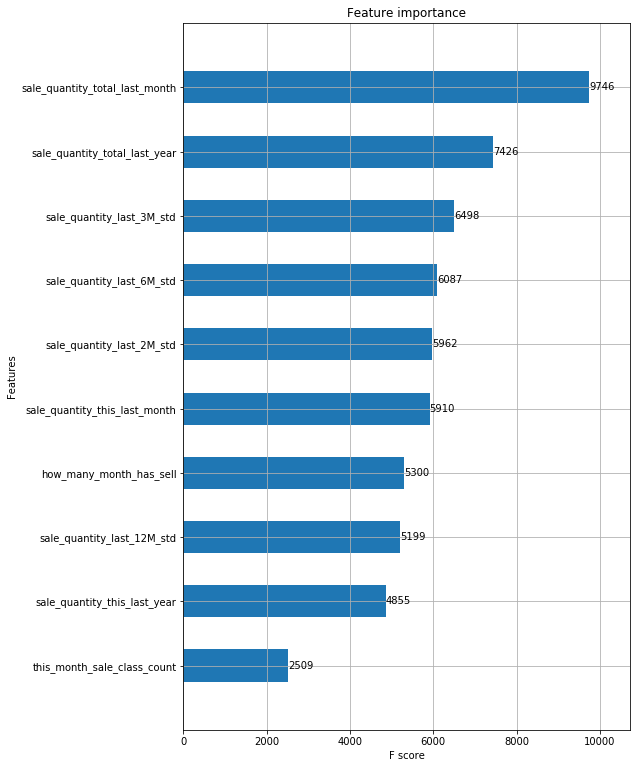

In [44]:
# 分析重要性
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=20, height=0.5, ax=ax)

## 测试其他

In [7]:
rmses = []
for i in range(5):    
    train_X,test_X, train_y, test_y = train_test_split(train,  
                                                        labels,  
                                                        test_size = 0.05)
    
    trainset = xgb.DMatrix(train_X,label=train_y)
    testset = xgb.DMatrix(test_X)
    
    params = {
    'booster': 'gbtree', # 基于树的模型进行计算
    'objective': 'reg:linear', # 线性回归
    'eval_metric': 'rmse', # RMSE 评价函数
    'gamma': 0, # 在树的叶子节点上进一步划分所需的最小损失减少。算法越大，越保守。
    'min_child_weight': 1, # 孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束。
    'max_depth': 5, # 树的最大深度。缺省值为6
    'lambda': 10, # L2 正则的惩罚系数
    'subsample': 0.8, # 用于训练模型的子样本占整个样本集合的比例。
    'colsample_bytree': 0.8, # 在建立树时对特征采样的比例。
    'tree_method': 'exact' # 树的构造算法-Exact greedy algorithm(确切贪心算法)
    }
    
    watchlist = [(trainset,'train')]
    model3 = xgb.train(params, trainset, num_boost_round=4000)
    predict_test_X = model3.predict(testset)
    rmsetmp = sp.sqrt(sp.mean((test_y - predict_test_X) ** 2))
    
    print('This time rmse is: '+ str(rmsetmp))
    rmses.append(rmsetmp)
    
def Get_Average(list):
    sum = 0
    for item in list:
        sum += item
    return sum/len(list)
    
print('Mean rmse of these is:' + str(Get_Average(rmses)))

This time rmse is: 103.689260071
This time rmse is: 136.947467971
This time rmse is: 195.617701906
This time rmse is: 117.006022413
This time rmse is: 187.162408403
Mean rmse of these is:148.084572153


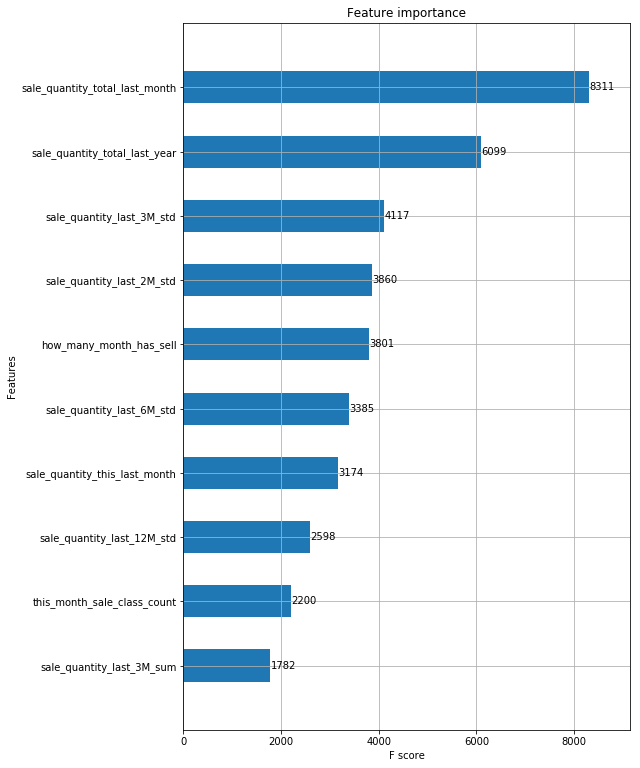

In [67]:
# 分析重要性
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=10, height=0.5, ax=ax)

## 利用全部训练集, 输出测试

In [9]:
rmses = []
trainset = xgb.DMatrix(train, label=labels)
testset = xgb.DMatrix(test)

params = {
'booster': 'gbtree', # 基于树的模型进行计算
'objective': 'reg:linear', # 线性回归
'eval_metric': 'rmse', # RMSE 评价函数
'gamma': 0.1, # 在树的叶子节点上进一步划分所需的最小损失减少。算法越大，越保守。
'min_child_weight': 1.1, # 孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束。
'max_depth': 5, # 树的最大深度。缺省值为6
'lambda': 10, # L2 正则的惩罚系数
'subsample': 0.8, # 用于训练模型的子样本占整个样本集合的比例。
'colsample_bytree': 0.8, # 在建立树时对特征采样的比例。
'tree_method': 'exact' # 树的构造算法-Exact greedy algorithm(确切贪心算法)
}

watchlist = [(trainset,'train')]
model = xgb.train(params, trainset, num_boost_round=4000,evals=watchlist)
predict_test_X = model.predict(testset)

[0]	train-rmse:437.295
[1]	train-rmse:342.853
[2]	train-rmse:278.983
[3]	train-rmse:237.744
[4]	train-rmse:209.452
[5]	train-rmse:191.36
[6]	train-rmse:177.068
[7]	train-rmse:167.863
[8]	train-rmse:158.592
[9]	train-rmse:152.637
[10]	train-rmse:147.945
[11]	train-rmse:143.626
[12]	train-rmse:139.604
[13]	train-rmse:135.598
[14]	train-rmse:131.68
[15]	train-rmse:129.497
[16]	train-rmse:126.991
[17]	train-rmse:125.437
[18]	train-rmse:122.872
[19]	train-rmse:121.299
[20]	train-rmse:119.31
[21]	train-rmse:116.981
[22]	train-rmse:114.799
[23]	train-rmse:112.456
[24]	train-rmse:110.235
[25]	train-rmse:108.682
[26]	train-rmse:108.14
[27]	train-rmse:106.691
[28]	train-rmse:104.8
[29]	train-rmse:102.79
[30]	train-rmse:100.809
[31]	train-rmse:99.3651
[32]	train-rmse:98.3605
[33]	train-rmse:97.4717
[34]	train-rmse:96.6685
[35]	train-rmse:95.2323
[36]	train-rmse:94.7559
[37]	train-rmse:93.7207
[38]	train-rmse:93.0776
[39]	train-rmse:91.8692
[40]	train-rmse:90.8904
[41]	train-rmse:90.2791
[42]	trai

[334]	train-rmse:20.2003
[335]	train-rmse:20.1434
[336]	train-rmse:20.0201
[337]	train-rmse:19.9644
[338]	train-rmse:19.9302
[339]	train-rmse:19.8673
[340]	train-rmse:19.7817
[341]	train-rmse:19.7357
[342]	train-rmse:19.6765
[343]	train-rmse:19.6288
[344]	train-rmse:19.5126
[345]	train-rmse:19.4687
[346]	train-rmse:19.3763
[347]	train-rmse:19.2936
[348]	train-rmse:19.2403
[349]	train-rmse:19.2167
[350]	train-rmse:19.1262
[351]	train-rmse:19.0739
[352]	train-rmse:19.0212
[353]	train-rmse:18.9813
[354]	train-rmse:18.8962
[355]	train-rmse:18.8594
[356]	train-rmse:18.7977
[357]	train-rmse:18.7659
[358]	train-rmse:18.6967
[359]	train-rmse:18.6197
[360]	train-rmse:18.5622
[361]	train-rmse:18.4884
[362]	train-rmse:18.4122
[363]	train-rmse:18.3425
[364]	train-rmse:18.2711
[365]	train-rmse:18.1697
[366]	train-rmse:18.0976
[367]	train-rmse:18.0386
[368]	train-rmse:17.9785
[369]	train-rmse:17.8984
[370]	train-rmse:17.8236
[371]	train-rmse:17.7687
[372]	train-rmse:17.7015
[373]	train-rmse:17.6874


[664]	train-rmse:7.23001
[665]	train-rmse:7.21947
[666]	train-rmse:7.19747
[667]	train-rmse:7.18371
[668]	train-rmse:7.16769
[669]	train-rmse:7.14533
[670]	train-rmse:7.11526
[671]	train-rmse:7.08727
[672]	train-rmse:7.07426
[673]	train-rmse:7.04667
[674]	train-rmse:7.0199
[675]	train-rmse:6.99512
[676]	train-rmse:6.97827
[677]	train-rmse:6.9579
[678]	train-rmse:6.93443
[679]	train-rmse:6.91246
[680]	train-rmse:6.89814
[681]	train-rmse:6.88207
[682]	train-rmse:6.86549
[683]	train-rmse:6.84877
[684]	train-rmse:6.82907
[685]	train-rmse:6.80966
[686]	train-rmse:6.79276
[687]	train-rmse:6.77827
[688]	train-rmse:6.76391
[689]	train-rmse:6.75323
[690]	train-rmse:6.74116
[691]	train-rmse:6.7154
[692]	train-rmse:6.70187
[693]	train-rmse:6.69084
[694]	train-rmse:6.67249
[695]	train-rmse:6.65622
[696]	train-rmse:6.64315
[697]	train-rmse:6.62401
[698]	train-rmse:6.60643
[699]	train-rmse:6.59206
[700]	train-rmse:6.57898
[701]	train-rmse:6.55988
[702]	train-rmse:6.54714
[703]	train-rmse:6.53148
[70

[994]	train-rmse:3.24258
[995]	train-rmse:3.23975
[996]	train-rmse:3.22227
[997]	train-rmse:3.21803
[998]	train-rmse:3.20492
[999]	train-rmse:3.19498
[1000]	train-rmse:3.1901
[1001]	train-rmse:3.17476
[1002]	train-rmse:3.16843
[1003]	train-rmse:3.16271
[1004]	train-rmse:3.15636
[1005]	train-rmse:3.14922
[1006]	train-rmse:3.13989
[1007]	train-rmse:3.13255
[1008]	train-rmse:3.12602
[1009]	train-rmse:3.11912
[1010]	train-rmse:3.11392
[1011]	train-rmse:3.10794
[1012]	train-rmse:3.10568
[1013]	train-rmse:3.09935
[1014]	train-rmse:3.09029
[1015]	train-rmse:3.07986
[1016]	train-rmse:3.07406
[1017]	train-rmse:3.06549
[1018]	train-rmse:3.05557
[1019]	train-rmse:3.0505
[1020]	train-rmse:3.04481
[1021]	train-rmse:3.03856
[1022]	train-rmse:3.03054
[1023]	train-rmse:3.02707
[1024]	train-rmse:3.02051
[1025]	train-rmse:3.01662
[1026]	train-rmse:3.01363
[1027]	train-rmse:3.00974
[1028]	train-rmse:3.00543
[1029]	train-rmse:3.00156
[1030]	train-rmse:2.99865
[1031]	train-rmse:2.99485
[1032]	train-rmse:2.

[1311]	train-rmse:1.70324
[1312]	train-rmse:1.69964
[1313]	train-rmse:1.69698
[1314]	train-rmse:1.69398
[1315]	train-rmse:1.69277
[1316]	train-rmse:1.69024
[1317]	train-rmse:1.68732
[1318]	train-rmse:1.68528
[1319]	train-rmse:1.68312
[1320]	train-rmse:1.68178
[1321]	train-rmse:1.68038
[1322]	train-rmse:1.67784
[1323]	train-rmse:1.67377
[1324]	train-rmse:1.67318
[1325]	train-rmse:1.66686
[1326]	train-rmse:1.66515
[1327]	train-rmse:1.66125
[1328]	train-rmse:1.65874
[1329]	train-rmse:1.65607
[1330]	train-rmse:1.65196
[1331]	train-rmse:1.64944
[1332]	train-rmse:1.6446
[1333]	train-rmse:1.6415
[1334]	train-rmse:1.63584
[1335]	train-rmse:1.63154
[1336]	train-rmse:1.62872
[1337]	train-rmse:1.62634
[1338]	train-rmse:1.62452
[1339]	train-rmse:1.6183
[1340]	train-rmse:1.61523
[1341]	train-rmse:1.61272
[1342]	train-rmse:1.61047
[1343]	train-rmse:1.60771
[1344]	train-rmse:1.60467
[1345]	train-rmse:1.60212
[1346]	train-rmse:1.59909
[1347]	train-rmse:1.59612
[1348]	train-rmse:1.59382
[1349]	train-rm

[1628]	train-rmse:1.02766
[1629]	train-rmse:1.02685
[1630]	train-rmse:1.02582
[1631]	train-rmse:1.02445
[1632]	train-rmse:1.0218
[1633]	train-rmse:1.02035
[1634]	train-rmse:1.01916
[1635]	train-rmse:1.01741
[1636]	train-rmse:1.01665
[1637]	train-rmse:1.01561
[1638]	train-rmse:1.01344
[1639]	train-rmse:1.0125
[1640]	train-rmse:1.01165
[1641]	train-rmse:1.01012
[1642]	train-rmse:1.00879
[1643]	train-rmse:1.00741
[1644]	train-rmse:1.00643
[1645]	train-rmse:1.00466
[1646]	train-rmse:1.00289
[1647]	train-rmse:0.999643
[1648]	train-rmse:0.997903
[1649]	train-rmse:0.997424
[1650]	train-rmse:0.996883
[1651]	train-rmse:0.995709
[1652]	train-rmse:0.994208
[1653]	train-rmse:0.992808
[1654]	train-rmse:0.991727
[1655]	train-rmse:0.989717
[1656]	train-rmse:0.987579
[1657]	train-rmse:0.986303
[1658]	train-rmse:0.984832
[1659]	train-rmse:0.983791
[1660]	train-rmse:0.981674
[1661]	train-rmse:0.980754
[1662]	train-rmse:0.979788
[1663]	train-rmse:0.979328
[1664]	train-rmse:0.977809
[1665]	train-rmse:0.97

[1934]	train-rmse:0.680353
[1935]	train-rmse:0.679673
[1936]	train-rmse:0.679169
[1937]	train-rmse:0.678426
[1938]	train-rmse:0.677943
[1939]	train-rmse:0.677399
[1940]	train-rmse:0.676504
[1941]	train-rmse:0.675617
[1942]	train-rmse:0.674524
[1943]	train-rmse:0.673833
[1944]	train-rmse:0.673196
[1945]	train-rmse:0.672705
[1946]	train-rmse:0.671518
[1947]	train-rmse:0.67093
[1948]	train-rmse:0.670151
[1949]	train-rmse:0.669452
[1950]	train-rmse:0.669019
[1951]	train-rmse:0.667877
[1952]	train-rmse:0.667594
[1953]	train-rmse:0.666937
[1954]	train-rmse:0.666264
[1955]	train-rmse:0.665843
[1956]	train-rmse:0.664994
[1957]	train-rmse:0.664292
[1958]	train-rmse:0.663244
[1959]	train-rmse:0.662698
[1960]	train-rmse:0.662151
[1961]	train-rmse:0.661317
[1962]	train-rmse:0.660519
[1963]	train-rmse:0.658679
[1964]	train-rmse:0.657813
[1965]	train-rmse:0.656918
[1966]	train-rmse:0.656241
[1967]	train-rmse:0.655706
[1968]	train-rmse:0.655026
[1969]	train-rmse:0.654231
[1970]	train-rmse:0.653689
[1

[2239]	train-rmse:0.488301
[2240]	train-rmse:0.487828
[2241]	train-rmse:0.487421
[2242]	train-rmse:0.486451
[2243]	train-rmse:0.486041
[2244]	train-rmse:0.485605
[2245]	train-rmse:0.48492
[2246]	train-rmse:0.484555
[2247]	train-rmse:0.483695
[2248]	train-rmse:0.483534
[2249]	train-rmse:0.482925
[2250]	train-rmse:0.48245
[2251]	train-rmse:0.481735
[2252]	train-rmse:0.480928
[2253]	train-rmse:0.480379
[2254]	train-rmse:0.479706
[2255]	train-rmse:0.479256
[2256]	train-rmse:0.47856
[2257]	train-rmse:0.477632
[2258]	train-rmse:0.477233
[2259]	train-rmse:0.476871
[2260]	train-rmse:0.476709
[2261]	train-rmse:0.476438
[2262]	train-rmse:0.475522
[2263]	train-rmse:0.474942
[2264]	train-rmse:0.47426
[2265]	train-rmse:0.473699
[2266]	train-rmse:0.473326
[2267]	train-rmse:0.472892
[2268]	train-rmse:0.472486
[2269]	train-rmse:0.471928
[2270]	train-rmse:0.47138
[2271]	train-rmse:0.471071
[2272]	train-rmse:0.470795
[2273]	train-rmse:0.47013
[2274]	train-rmse:0.46964
[2275]	train-rmse:0.469128
[2276]	t

[2544]	train-rmse:0.362247
[2545]	train-rmse:0.361897
[2546]	train-rmse:0.361643
[2547]	train-rmse:0.361268
[2548]	train-rmse:0.360883
[2549]	train-rmse:0.360657
[2550]	train-rmse:0.360344
[2551]	train-rmse:0.359946
[2552]	train-rmse:0.359727
[2553]	train-rmse:0.359477
[2554]	train-rmse:0.359031
[2555]	train-rmse:0.35881
[2556]	train-rmse:0.358691
[2557]	train-rmse:0.358456
[2558]	train-rmse:0.358117
[2559]	train-rmse:0.357803
[2560]	train-rmse:0.357332
[2561]	train-rmse:0.356848
[2562]	train-rmse:0.35663
[2563]	train-rmse:0.356428
[2564]	train-rmse:0.356125
[2565]	train-rmse:0.355978
[2566]	train-rmse:0.355479
[2567]	train-rmse:0.355194
[2568]	train-rmse:0.354921
[2569]	train-rmse:0.354691
[2570]	train-rmse:0.354617
[2571]	train-rmse:0.354479
[2572]	train-rmse:0.353824
[2573]	train-rmse:0.353641
[2574]	train-rmse:0.353433
[2575]	train-rmse:0.353206
[2576]	train-rmse:0.352832
[2577]	train-rmse:0.352553
[2578]	train-rmse:0.352399
[2579]	train-rmse:0.352074
[2580]	train-rmse:0.351556
[25

[2849]	train-rmse:0.283505
[2850]	train-rmse:0.283286
[2851]	train-rmse:0.2832
[2852]	train-rmse:0.282977
[2853]	train-rmse:0.282739
[2854]	train-rmse:0.28266
[2855]	train-rmse:0.282358
[2856]	train-rmse:0.282224
[2857]	train-rmse:0.282047
[2858]	train-rmse:0.281923
[2859]	train-rmse:0.281699
[2860]	train-rmse:0.281505
[2861]	train-rmse:0.281282
[2862]	train-rmse:0.281181
[2863]	train-rmse:0.281101
[2864]	train-rmse:0.280813
[2865]	train-rmse:0.280555
[2866]	train-rmse:0.280276
[2867]	train-rmse:0.279948
[2868]	train-rmse:0.279687
[2869]	train-rmse:0.279402
[2870]	train-rmse:0.279253
[2871]	train-rmse:0.278984
[2872]	train-rmse:0.278922
[2873]	train-rmse:0.27871
[2874]	train-rmse:0.278616
[2875]	train-rmse:0.278335
[2876]	train-rmse:0.278198
[2877]	train-rmse:0.278036
[2878]	train-rmse:0.277931
[2879]	train-rmse:0.277744
[2880]	train-rmse:0.277657
[2881]	train-rmse:0.27758
[2882]	train-rmse:0.277482
[2883]	train-rmse:0.277183
[2884]	train-rmse:0.276997
[2885]	train-rmse:0.276808
[2886]

[3155]	train-rmse:0.23738
[3156]	train-rmse:0.237343
[3157]	train-rmse:0.237141
[3158]	train-rmse:0.237031
[3159]	train-rmse:0.236946
[3160]	train-rmse:0.236858
[3161]	train-rmse:0.236635
[3162]	train-rmse:0.236467
[3163]	train-rmse:0.236428
[3164]	train-rmse:0.236292
[3165]	train-rmse:0.236103
[3166]	train-rmse:0.235979
[3167]	train-rmse:0.23587
[3168]	train-rmse:0.23573
[3169]	train-rmse:0.235582
[3170]	train-rmse:0.235467
[3171]	train-rmse:0.23541
[3172]	train-rmse:0.235324
[3173]	train-rmse:0.235209
[3174]	train-rmse:0.235147
[3175]	train-rmse:0.234923
[3176]	train-rmse:0.234838
[3177]	train-rmse:0.234788
[3178]	train-rmse:0.234715
[3179]	train-rmse:0.234612
[3180]	train-rmse:0.234492
[3181]	train-rmse:0.2344
[3182]	train-rmse:0.234262
[3183]	train-rmse:0.23423
[3184]	train-rmse:0.234129
[3185]	train-rmse:0.233931
[3186]	train-rmse:0.233922
[3187]	train-rmse:0.233748
[3188]	train-rmse:0.233527
[3189]	train-rmse:0.233511
[3190]	train-rmse:0.233374
[3191]	train-rmse:0.233346
[3192]	t

[3460]	train-rmse:0.208936
[3461]	train-rmse:0.208851
[3462]	train-rmse:0.208797
[3463]	train-rmse:0.208756
[3464]	train-rmse:0.208641
[3465]	train-rmse:0.208622
[3466]	train-rmse:0.208622
[3467]	train-rmse:0.208589
[3468]	train-rmse:0.208487
[3469]	train-rmse:0.208438
[3470]	train-rmse:0.20842
[3471]	train-rmse:0.208359
[3472]	train-rmse:0.208292
[3473]	train-rmse:0.20819
[3474]	train-rmse:0.208136
[3475]	train-rmse:0.208068
[3476]	train-rmse:0.208068
[3477]	train-rmse:0.208018
[3478]	train-rmse:0.207923
[3479]	train-rmse:0.207815
[3480]	train-rmse:0.207766
[3481]	train-rmse:0.207727
[3482]	train-rmse:0.207501
[3483]	train-rmse:0.207356
[3484]	train-rmse:0.207233
[3485]	train-rmse:0.207166
[3486]	train-rmse:0.207078
[3487]	train-rmse:0.207082
[3488]	train-rmse:0.207006
[3489]	train-rmse:0.206981
[3490]	train-rmse:0.206875
[3491]	train-rmse:0.20686
[3492]	train-rmse:0.206813
[3493]	train-rmse:0.206783
[3494]	train-rmse:0.206763
[3495]	train-rmse:0.206723
[3496]	train-rmse:0.206654
[349

[3765]	train-rmse:0.190489
[3766]	train-rmse:0.190474
[3767]	train-rmse:0.190447
[3768]	train-rmse:0.190444
[3769]	train-rmse:0.190382
[3770]	train-rmse:0.19036
[3771]	train-rmse:0.190265
[3772]	train-rmse:0.190251
[3773]	train-rmse:0.19021
[3774]	train-rmse:0.190108
[3775]	train-rmse:0.189995
[3776]	train-rmse:0.189995
[3777]	train-rmse:0.18997
[3778]	train-rmse:0.189961
[3779]	train-rmse:0.189908
[3780]	train-rmse:0.189871
[3781]	train-rmse:0.189849
[3782]	train-rmse:0.18981
[3783]	train-rmse:0.189806
[3784]	train-rmse:0.189776
[3785]	train-rmse:0.189707
[3786]	train-rmse:0.189657
[3787]	train-rmse:0.189656
[3788]	train-rmse:0.18966
[3789]	train-rmse:0.189648
[3790]	train-rmse:0.189648
[3791]	train-rmse:0.189607
[3792]	train-rmse:0.18956
[3793]	train-rmse:0.18956
[3794]	train-rmse:0.189511
[3795]	train-rmse:0.189463
[3796]	train-rmse:0.189413
[3797]	train-rmse:0.189417
[3798]	train-rmse:0.18938
[3799]	train-rmse:0.189272
[3800]	train-rmse:0.189282
[3801]	train-rmse:0.189276
[3802]	tr

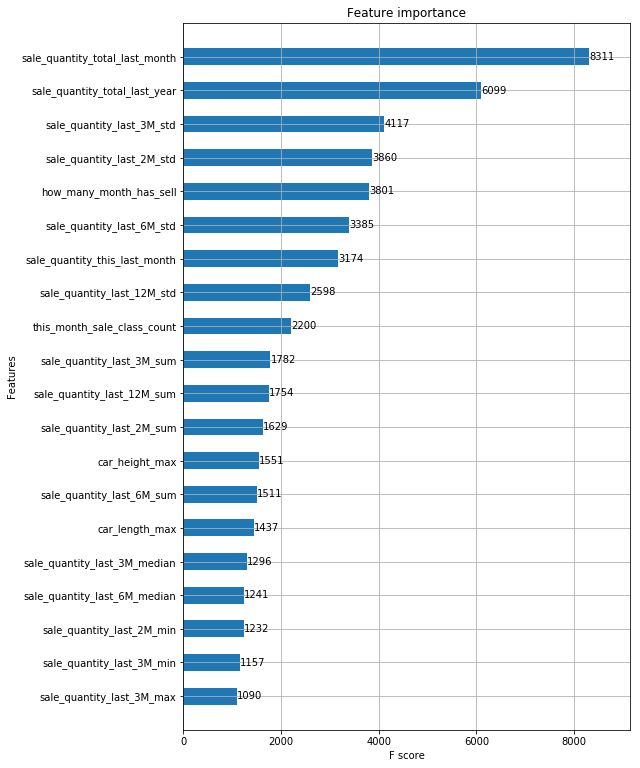

In [13]:
# 分析重要性
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=20, height=0.5, ax=ax)

In [14]:
submit['predict_quantity'] = predict_test_X
submit.to_csv('../../raw/LiChuan/result_20180208_xgboost-allfeatures.csv',index=False, header=True)  

## allfeatures + baseline *1.1

In [20]:
baseline = pd.read_csv('../../raw/Submissions/result_201710.csv')
submit['predict_quantity'] = baseline['predict_quantity'] * 1.1 * 0.5 + predict_test_X * 0.5

In [21]:
submit.to_csv('../../raw/LiChuan/result_20180208_xgboost-allfeatures*0.5-baseline*0.5*1.1.csv',index=False, header=True) 